In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50

In [66]:
df= pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round3.csv')

In [67]:
df.drop(["Unnamed: 0"], axis=1,inplace=True)

In [68]:
numerical = df.select_dtypes(int)

In [69]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,26794,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,15,31,1,7,707
...,...,...,...,...,...,...,...,...
10684,15563,64811,253,8,40,2,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [70]:
categoricals = df.select_dtypes(object)


## Activity 6

### One Hot/Label Encoding of the categorical variables in the categoricals data frame

In [71]:
categoricals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   region             10689 non-null  object
 1   response           10689 non-null  object
 2   coverage           10689 non-null  object
 3   education          10689 non-null  object
 4   effective_to_date  10689 non-null  object
 5   month              10689 non-null  object
 6   employment_status  10689 non-null  object
 7   gender             10689 non-null  object
 8   location_code      10689 non-null  object
 9   marital_status     10689 non-null  object
 10  policy_type        10689 non-null  object
 11  policy             10689 non-null  object
 12  renew_offer_type   10689 non-null  object
 13  sales_channel      10689 non-null  object
 14  vehicle_class      10689 non-null  object
 15  vehicle_size       10689 non-null  object
dtypes: object(16)
memory usage: 1.3+ MB


I am goind to delete "effective_to_date" because it doesn't make sense to make dummies from every date. In addition we already have a "Month" column.

In [72]:
categoricals.drop(["effective_to_date"],axis=1,inplace=True)

/home/dani/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [73]:
categoricals

,region,response,coverage,education,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


#### Which one are ordinals? 
As we have some columns with an order, we want to change it manually

In [74]:
categoricals.coverage.unique()

array(['basic', 'extended', 'premium'], dtype=object)

In [75]:
categoricals["coverage"]  = categoricals["coverage"].replace({'basic': '0', 'extended': '1', 'premium': '2'})

<ipython-input-75-e1d9039445fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoricals["coverage"]  = categoricals["coverage"].replace({'basic': '0', 'extended': '1', 'premium': '2'})


In [76]:
categoricals.education.unique()

array(['college', 'bachelor', 'high school or below', 'doctor', 'master'],
      dtype=object)

In [77]:
categoricals["education"]  = categoricals["education"].replace({'high school or below': '0', 'college': '1', 'bachelor': '2', 'master': '3', 'doctor': '4'})

<ipython-input-77-b3e6e3c73703>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoricals["education"]  = categoricals["education"].replace({'high school or below': '0', 'college': '1', 'bachelor': '2', 'master': '3', 'doctor': '4'})


In [78]:
categoricals.month.unique()

array(['feb', 'jan'], dtype=object)

In [79]:
categoricals["month"]  = categoricals["month"].replace({'jan': '0', 'feb': '1'})

<ipython-input-79-817c78909473>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoricals["month"]  = categoricals["month"].replace({'jan': '0', 'feb': '1'})


In [80]:
categoricals.vehicle_size.unique()

array(['medsize', 'small', 'large'], dtype=object)

In [81]:
categoricals["vehicle_size"]  = categoricals["vehicle_size"].replace({'small': '0', 'medsize': '1','large': '2' })

<ipython-input-81-8b0165ea3450>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoricals["vehicle_size"]  = categoricals["vehicle_size"].replace({'small': '0', 'medsize': '1','large': '2' })


In [82]:
categoricals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   region             10689 non-null  object
 1   response           10689 non-null  object
 2   coverage           10689 non-null  object
 3   education          10689 non-null  object
 4   month              10689 non-null  object
 5   employment_status  10689 non-null  object
 6   gender             10689 non-null  object
 7   location_code      10689 non-null  object
 8   marital_status     10689 non-null  object
 9   policy_type        10689 non-null  object
 10  policy             10689 non-null  object
 11  renew_offer_type   10689 non-null  object
 12  sales_channel      10689 non-null  object
 13  vehicle_class      10689 non-null  object
 14  vehicle_size       10689 non-null  object
dtypes: object(15)
memory usage: 1.2+ MB


#### Which one are nominals? 

Just use get dummies, as we don't need an order

In [83]:
categoricals = pd.get_dummies(data=categoricals, columns=['region', 'response','employment_status','gender','location_code','marital_status','policy_type','policy','renew_offer_type','sales_channel','vehicle_class'], drop_first=True)

### Remove the outliers from the numerical columns

I decide to remove outliers on columns 1,3,8, where there are a lot.

### check if there are highly correlated features and drop them if there are any.

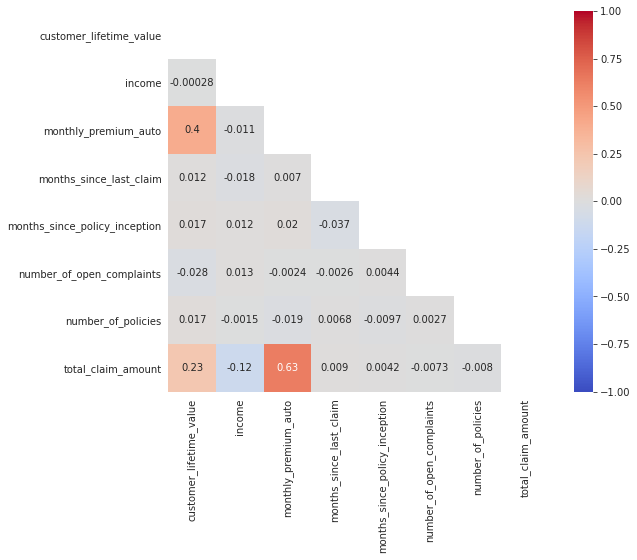

In [84]:
corr = numerical.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

### X-y split (y is the target variable which is the total claim amount)

In [85]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,26794,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,15,31,1,7,707
...,...,...,...,...,...,...,...,...
10684,15563,64811,253,8,40,2,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [86]:
categoricals

,coverage,education,month,vehicle_size,region_east,region_north west,region_west region,response_yes,employment_status_employed,employment_status_medical leave,...,renew_offer_type_offer3,renew_offer_type_offer4,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car
0,0,1,1,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2,0,2,1,1,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
3,1,1,0,1,0,1,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
4,2,2,0,1,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,2,2,0,1,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0
10685,0,1,0,1,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
10686,1,2,1,1,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
10687,2,1,1,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [87]:
df = pd.concat([numerical, categoricals], axis=1)
df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,coverage,education,...,renew_offer_type_offer3,renew_offer_type_offer4,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car
0,4809,48029,61,7,52,0,9,292,0,1,...,1,0,0,0,0,0,0,0,0,0
1,2228,26794,64,3,26,0,1,744,0,1,...,0,1,0,1,0,0,0,0,0,0
2,14947,22139,100,34,31,0,2,480,0,2,...,1,0,0,1,0,0,0,0,1,0
3,22332,49078,97,10,3,0,2,484,1,1,...,0,0,1,0,0,0,0,0,0,0
4,9025,23675,117,15,31,1,7,707,2,2,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,15563,64811,253,8,40,2,7,1214,2,2,...,1,0,0,0,1,1,0,0,0,0
10685,5259,61146,65,7,68,0,6,273,0,1,...,0,0,1,0,0,0,0,0,0,0
10686,23893,39837,201,11,63,0,2,381,1,2,...,0,0,0,0,1,0,1,0,0,0
10687,11971,64195,158,0,27,4,6,618,2,1,...,0,0,1,0,0,0,0,0,1,0


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   customer_lifetime_value          10689 non-null  int64 
 1   income                           10689 non-null  int64 
 2   monthly_premium_auto             10689 non-null  int64 
 3   months_since_last_claim          10689 non-null  int64 
 4   months_since_policy_inception    10689 non-null  int64 
 5   number_of_open_complaints        10689 non-null  int64 
 6   number_of_policies               10689 non-null  int64 
 7   total_claim_amount               10689 non-null  int64 
 8   coverage                         10689 non-null  object
 9   education                        10689 non-null  object
 10  month                            10689 non-null  object
 11  vehicle_size                     10689 non-null  object
 12  region_east                     

In [89]:
df["coverage"] = df["coverage"].astype(int)
df["education"] = df["education"].astype(int)
df["month"] = df["month"].astype(int)
df["vehicle_size"] = df["vehicle_size"].astype(int)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   customer_lifetime_value          10689 non-null  int64
 1   income                           10689 non-null  int64
 2   monthly_premium_auto             10689 non-null  int64
 3   months_since_last_claim          10689 non-null  int64
 4   months_since_policy_inception    10689 non-null  int64
 5   number_of_open_complaints        10689 non-null  int64
 6   number_of_policies               10689 non-null  int64
 7   total_claim_amount               10689 non-null  int64
 8   coverage                         10689 non-null  int64
 9   education                        10689 non-null  int64
 10  month                            10689 non-null  int64
 11  vehicle_size                     10689 non-null  int64
 12  region_east                      10689 non-nul

<b>Data Splitting: for now we are going tp use only numerical

In [91]:
X = df.drop("total_claim_amount", axis=1)
y = df["total_claim_amount"]

## Activity 7

In [92]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

### ALL THE TRANSFORMATIONS HAS TO BEEN DONE AFTER THE SPLITTING AND APPLIED TO A NEW X_TRAIN CALLED X_TRAIN_SCALED OR X_TRAIN_TRANSFORMATION OR WHATEVER

<b>First transformation: Standarize the data

In [93]:
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

In [94]:
X_train_scaled

array([[-0.11021627, -1.2632667 , -0.67143823, ..., -0.23608442,
        -0.48861204,  1.95232568],
       [-0.42794064, -1.36853038, -0.72925469, ..., -0.23608442,
        -0.48861204,  1.95232568],
       [-0.5223013 ,  0.26299646,  0.48489091, ..., -0.23608442,
         2.04661352, -0.51220962],
       ...,
       [-0.81132612, -1.16342071, -0.90270406, ..., -0.23608442,
        -0.48861204,  1.95232568],
       [ 2.25575772,  0.97656622, -0.78707115, ..., -0.23608442,
        -0.48861204, -0.51220962],
       [ 1.18923585, -0.01438919, -0.55580532, ..., -0.23608442,
        -0.48861204, -0.51220962]])

In [95]:
X_train_scaled.shape

(7482, 45)

In [96]:
X_test_scaled=std_scaler.transform(X_test)

<b>Second transformation: Power transformer to get a normal distribution

/home/dani/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>,
        <AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>,
        <AxesSubplot:title={'center':'number_of_policies'}>],
       [<AxesSubplot:title={'center':'coverage'}>,
        <AxesSubplot:title={'center':'education'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'vehicle_size'}>,
        <AxesSubplot:title={'center':'region_east'}>,
        <AxesSubplot:title={'center':'region_north west'}>,
        <AxesSubplot:title={'center':'region_west region'}>],
       [<AxesSubplot:title={'center':'response_yes'}>,
        <AxesSubplot:title={'center':'employment_status_employed'}>,
        <AxesSubplot:title={'center':'employment

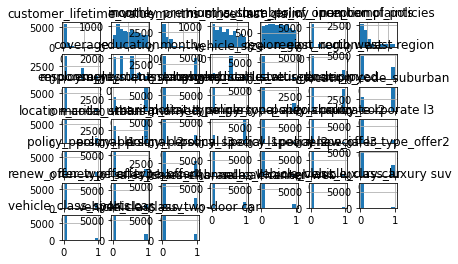

In [97]:
X_train.hist()

In [98]:
power=PowerTransformer().fit(X_train_scaled)   ##. finding the parameters ( mean, variance from the training set )

In [99]:
power= PowerTransformer()
power.fit(X_train_scaled)
X_train_trans = power.transform(X_train_scaled)
X_test_trans = power.transform(X_test_scaled)


In [100]:
# We should check is now looks normal distributed

<b> Apply linear regression

In [101]:
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train

LinearRegression()

<b> model parameters  (b1,b2,b3,b4,b5,b6,b7)

In [102]:
model.coef_

array([-1.10958398e-03, -4.66503127e+00,  1.79142183e+02,  4.94099988e+00,
        5.28307714e-01,  1.84905834e+00, -1.11863089e+00, -5.61179496e+00,
       -4.34194806e+00,  7.41776458e-01, -2.01604881e-01,  2.61975323e+00,
       -4.81436310e-02,  3.09151966e+00, -9.31041726e+00, -2.44107365e+00,
        4.01246648e+00,  1.83958505e-01,  3.82139599e+01,  7.60886144e+00,
        1.84725127e+02,  8.48460381e+01, -6.10573508e-01,  3.05863644e+01,
       -3.73092506e+13,  2.55684866e+13, -1.78381829e+00, -7.35106704e-01,
        2.93091237e+13,  3.59101069e+13,  4.14421013e+13, -1.05890670e+13,
       -1.68794324e+13, -1.65598009e+13,  6.77295999e+00,  3.64416051e+00,
        2.04924893e+00,  8.59441547e-01, -4.98565378e-01, -1.39616425e+00,
        4.89927970e+00, -7.85226692e-01, -4.92620330e+00, -6.04237040e+00,
        3.14031174e-01])

In [103]:
model.intercept_

433.05891881726154

<b> Making predictions

We make predictions (y_pred) using X_test_scaled

In [104]:
y_pred=model.predict(X_test_scaled)   # model prediction

y_pred_train=model.predict(X_train_scaled)

In [105]:
y_pred.shape

(3207,)

In [106]:
y_pred_train.shape

(7482,)

In [107]:
y.shape

(10689,)

### Model evaluation

In [108]:
y_test

4665     345
4072     345
4549     257
4211     445
3081     523
        ... 
3488     404
1667     554
1516     350
10215     27
2931     320
Name: total_claim_amount, Length: 3207, dtype: int64

In [109]:
y_pred.shape   #same shape as y_test

(3207,)

In [110]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})
result

,y_test,y_pred
4665,345,474.304696
4072,345,405.165183
4549,257,129.388342
4211,445,382.464349
3081,523,419.858130
...,...,...
3488,404,346.437005
1667,554,547.220424
1516,350,578.666191
10215,27,-11.843913


### Analizing the model. What kind of plot you will get if all the all the predictions are ok? A stright line

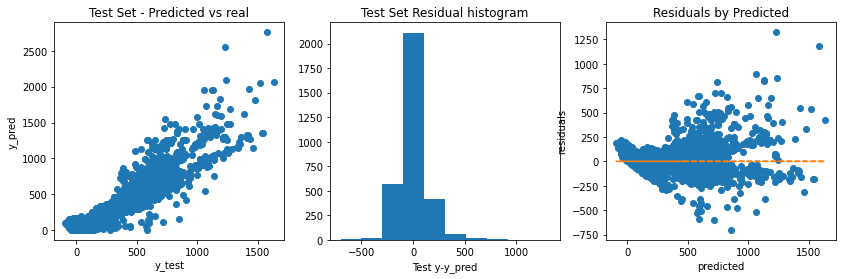

In [111]:
# Make an scatter plot y_pred vs y

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set - Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

In [112]:
# first plot: checking linearity
# second plot: checking normality of residuals. It is a normal distribution, and the majority of residuals are close to 0. good! 
# --> No over or under estimation
# third plot: checking homoscedasticity. No constance variance. Predictions are very bad

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

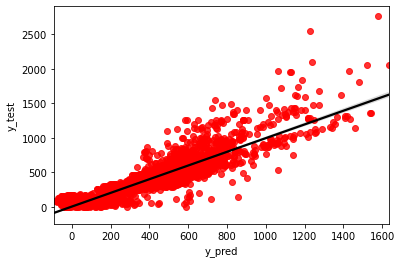

In [113]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

### Model evaluation

In [ ]:
print ("MSE is " + str(mse(y_test,y_pred)))
print ("RMSE is " + str(mse(y_test,y_pred,squared=False)))
print ("Mean absolute error - MAE - is " + str(mae(y_test,y_pred)))

- r2

In [118]:
R2 = r2_score(y_test,y_pred)
R2

0.7702670727822241

- Adjusted r2

In [119]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.7669965945396426

### Evaluate error metrics also on train test

- If error_train very high -> Underfitting ( consider other model or to  add more variables)
- If error_train <= error_test -> Ok
- If error_train very small and <<<< error_test -> Overfitting!!!! ( you overtrained your model  or you did not applied the transformer to the test set ).


In [120]:
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)

In [121]:
R2_test, R2_train   #OK

(0.7702670727822241, 0.7703913769275393)

### Feature importance
- In order to check which independent features are more relevant to your model, compare the absolute value of each coefficient.

In [122]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [123]:
features_importances

,Attribute,Importance
30,policy_personal l3,4.144210e+13
24,policy_type_personal auto,3.730925e+13
29,policy_personal l2,3.591011e+13
28,policy_personal l1,2.930912e+13
25,policy_type_special auto,2.556849e+13
32,policy_special l2,1.687943e+13
33,policy_special l3,1.655980e+13
31,policy_special l1,1.058907e+13
20,location_code_suburban,1.847251e+02
2,monthly_premium_auto,1.791422e+02


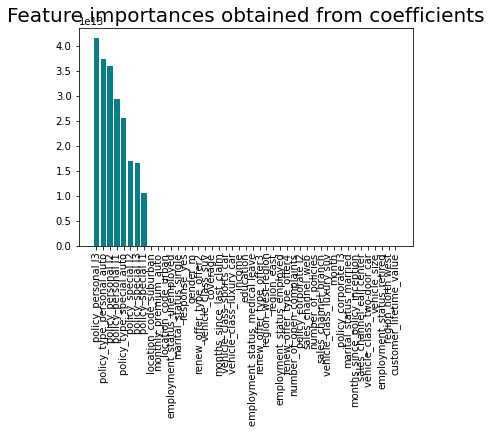

In [124]:
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

/home/dani/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:>]], dtype=object)

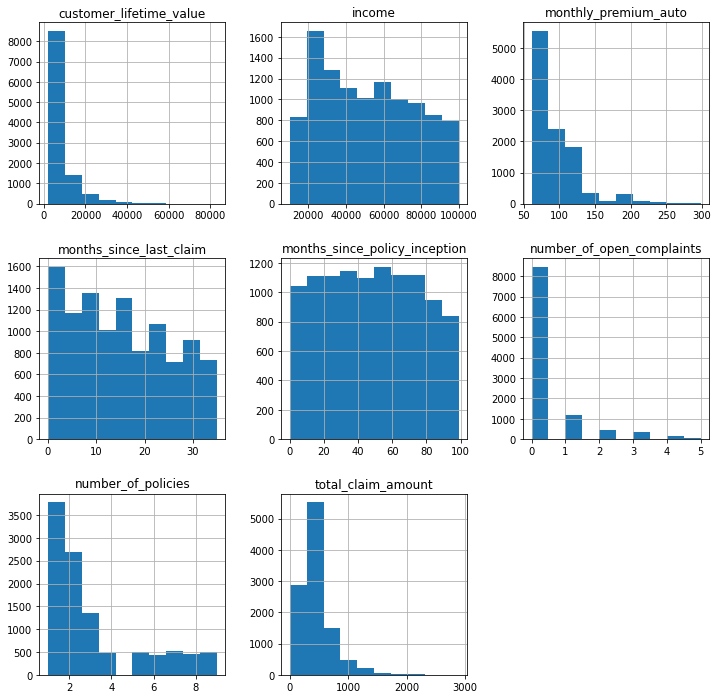

In [125]:
numerical.hist(figsize=(12,12))

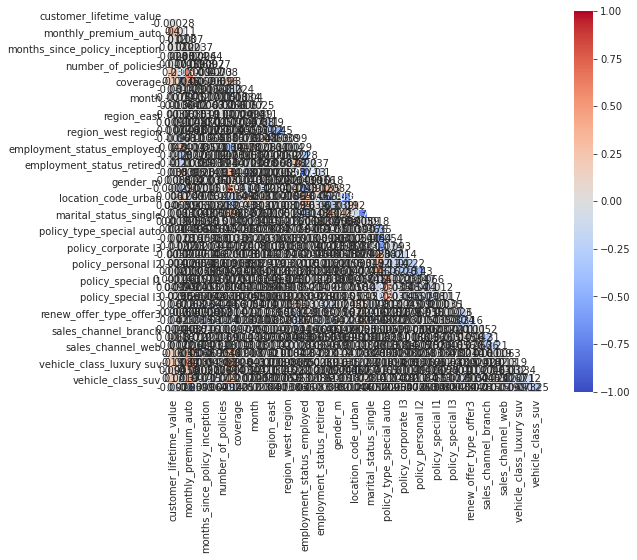

In [126]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [127]:
corr = df.corr()
corr

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,coverage,education,...,renew_offer_type_offer3,renew_offer_type_offer4,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury car,vehicle_class_luxury suv,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car
customer_lifetime_value,1.000000,-0.000276,0.404235,0.012466,0.017055,-0.028099,0.016789,0.232849,0.170806,-0.031057,...,-0.007024,-0.040862,0.004422,0.006752,-0.012246,0.163747,0.187659,0.093850,0.166385,-0.096761
income,-0.000276,1.000000,-0.010804,-0.018013,0.011509,0.013057,-0.001515,-0.118201,-0.003548,0.013909,...,0.006659,0.023061,-0.004288,0.018077,0.011746,-0.005116,-0.008400,-0.005756,0.001901,0.015936
monthly_premium_auto,0.404235,-0.010804,1.000000,0.006959,0.019696,-0.002423,-0.018805,0.630149,0.456743,-0.028805,...,-0.008691,-0.028171,-0.003487,-0.007208,0.000621,0.445642,0.472334,0.183745,0.365401,-0.233615
months_since_last_claim,0.012466,-0.018013,0.006959,1.000000,-0.036883,-0.002617,0.006791,0.008979,0.006182,-0.001024,...,-0.009203,-0.014512,0.007070,0.012418,-0.014072,0.006757,0.008880,-0.000507,-0.007097,0.009935
months_since_policy_inception,0.017055,0.011509,0.019696,-0.036883,1.000000,0.004368,-0.009719,0.004186,0.009629,0.015590,...,0.000864,-0.067973,0.015632,-0.020834,0.007344,0.006932,0.013545,0.022071,-0.015326,-0.000643
number_of_open_complaints,-0.028099,0.013057,-0.002423,-0.002617,0.004368,1.000000,0.002748,-0.007332,-0.006924,0.006200,...,-0.001165,-0.011062,-0.011146,0.001709,-0.011040,0.002469,0.008821,-0.007575,-0.016518,-0.001974
number_of_policies,0.016789,-0.001515,-0.018805,0.006791,-0.009719,0.002748,1.000000,-0.008019,-0.015515,-0.008162,...,0.008062,-0.074386,-0.014350,0.006896,0.012648,-0.004773,-0.008879,0.007119,-0.011125,-0.009167
total_claim_amount,0.232849,-0.118201,0.630149,0.008979,0.004186,-0.007332,-0.008019,1.000000,0.277103,-0.134500,...,-0.013851,-0.041172,-0.009727,-0.001989,-0.001076,0.312829,0.300258,0.093886,0.216461,-0.142435
coverage,0.170806,-0.003548,0.456743,0.006182,0.009629,-0.006924,-0.015515,0.277103,1.000000,-0.023618,...,-0.006991,-0.028425,0.007428,-0.013514,-0.012972,0.009057,0.027908,0.000338,-0.006957,-0.024637
education,-0.031057,0.013909,-0.028805,-0.001024,0.015590,0.006200,-0.008162,-0.134500,-0.023618,1.000000,...,0.012401,-0.027452,0.002896,0.013039,-0.000233,-0.017616,-0.004341,-0.012340,-0.012041,0.012226
